In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn

import torch.optim as optim

from copy import deepcopy

from torch.distributions import Categorical

import itertools

import sys
sys.path.insert(0, './../libraries/')

import partial_marginalization_lib as pm_lib
import gmm_experiments_lib as gmm_lib

In [2]:
softmax = nn.Softmax(dim = 0)

sigmoid = nn.Sigmoid()

In [3]:
import torch

In [4]:
np.random.seed(4524)
_ = torch.manual_seed(4524)

We are interested in minimizing an objective of the form 
\begin{align}
E_{q_\eta(z)}[f(z)]
\end{align}
where $z$ is a discrete random variable, so the re-parametrization trick does not apply. 

We consider a simple experiment, and examine the performance of REINFORCE, ARM, and a new proposed method. 


In [5]:
mu0 = torch.Tensor([0, 0])
sigma0 = 10.
n_clusters = 5

n_obs = 3

In [6]:
gmm_experiment = gmm_lib.GMMExperiments(n_obs, mu0, sigma0, n_clusters)

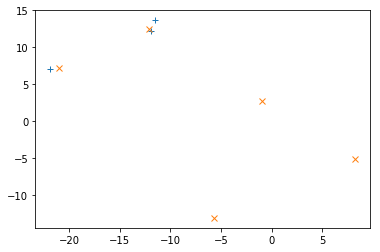

In [7]:
plt.plot(gmm_experiment.y[:, 0].numpy(), gmm_experiment.y[:, 1].numpy(), '+')
plt.plot(gmm_experiment.true_mus[:, 0].numpy(), gmm_experiment.true_mus[:, 1].numpy(), 'x')

In [8]:
foo = torch.LongTensor([1, 3, 0])

In [9]:
gmm_experiment._get_centroid_mask(2)

tensor([[ 0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.]])

In [10]:
_ = gmm_experiment.get_log_class_weights()
gmm_experiment.get_loss_conditional_z(2)

tensor([ 114.2508,   90.3018,  122.0056])

In [13]:
deepcopy([[2, 3], 2])

[[2, 3], 2]

In [12]:
obj_class_reinforce = pm_lib.PartialMarginalizationREINFORCE(
                        f_z = gmm_experiment.get_loss_conditional_z,
                        var_params = gmm_experiment.var_params,
                        get_log_q_from_var_params = gmm_experiment.get_log_class_weights)

TypeError: can't pickle generator objects